In [19]:
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# Nikola Jokić
career = PlayerCareerStats(player_id='203999') 

# Get career statistics as a dictionary
career_dict = career.get_dict()

# Extract the data and headers from the response dictionary
data = career_dict['resultSets'][0]['rowSet']
headers = career_dict['resultSets'][0]['headers']

# Create a DataFrame using the data and headers
career_data = pd.DataFrame(data, columns=headers)

# Now, career_data contains the career statistics as a DataFrame


# I compared the DataFrame you provided with the JSON data, and I found that there is a discrepancy in the data related to the "FG3A" and "FG3_PCT" columns for the season "2015-16". Here's the specific discrepancy:

# DataFrame (career_data):

# "FG3A" for the season "2015-16" is 600.
# "FG3_PCT" for the season "2015-16" is 0.333.
# JSON Data (corresponding row in "SeasonTotalsRegularSeason" under "resultSets"):

# "FG3A" for the season "2015-16" is 84.
# "FG3_PCT" for the season "2015-16" is 0.333.
# It appears that there is a discrepancy in the "FG3A" value for the season "2015-16" between the DataFrame and the JSON data. The DataFrame shows a value of 600, while the JSON data shows a value of 84. Please double-check the data source to ensure accuracy and consistency.

# Other than this specific discrepancy, the rest of the data appears to match between the DataFrame and the JSON data for the provided player's career statistics.

1y

In [20]:
career_data


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203999,2015-16,00,1610612743,DEN,21.0,80,55,1733.0,307,...,0.811,181,379,560,189,79,50,104,208,796
1,203999,2016-17,00,1610612743,DEN,22.0,73,59,2038.0,494,...,0.825,212,506,718,359,61,55,171,214,1221
2,203999,2017-18,00,1610612743,DEN,23.0,75,73,2443.0,504,...,0.850,195,608,803,458,90,61,210,212,1385
3,203999,2018-19,00,1610612743,DEN,24.0,80,80,2504.0,616,...,0.821,228,637,865,580,108,55,248,228,1604
4,203999,2019-20,00,1610612743,DEN,25.0,73,73,2335.0,565,...,0.817,166,545,711,512,85,44,226,222,1456
5,203999,2020-21,00,1610612743,DEN,26.0,72,72,2488.0,732,...,0.868,205,575,780,599,95,48,222,192,1898
6,203999,2021-22,00,1610612743,DEN,27.0,74,74,2476.0,764,...,0.810,206,813,1019,584,109,63,281,191,2004
7,203999,2022-23,00,1610612743,DEN,28.0,69,69,2323.0,646,...,0.822,167,650,817,678,87,47,247,174,1690


In [10]:
career_json

'{"resource": "playercareerstats", "parameters": {"PerMode": "Totals", "PlayerID": 203999, "LeagueID": null}, "resultSets": [{"name": "SeasonTotalsRegularSeason", "headers": ["PLAYER_ID", "SEASON_ID", "LEAGUE_ID", "TEAM_ID", "TEAM_ABBREVIATION", "PLAYER_AGE", "GP", "GS", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS"], "rowSet": [[203999, "2015-16", "00", 1610612743, "DEN", 21.0, 80, 55, 1733.0, 307, 600, 0.512, 28, 84, 0.333, 154, 190, 0.811, 181, 379, 560, 189, 79, 50, 104, 208, 796], [203999, "2016-17", "00", 1610612743, "DEN", 22.0, 73, 59, 2038.0, 494, 854, 0.578, 45, 139, 0.324, 188, 228, 0.825, 212, 506, 718, 359, 61, 55, 171, 214, 1221], [203999, "2017-18", "00", 1610612743, "DEN", 23.0, 75, 73, 2443.0, 504, 1010, 0.499, 111, 280, 0.396, 266, 313, 0.85, 195, 608, 803, 458, 90, 61, 210, 212, 1385], [203999, "2018-19", "00", 1610612743, "DEN", 24.0, 80, 80, 2504.0, 616, 1206, 0.511, 

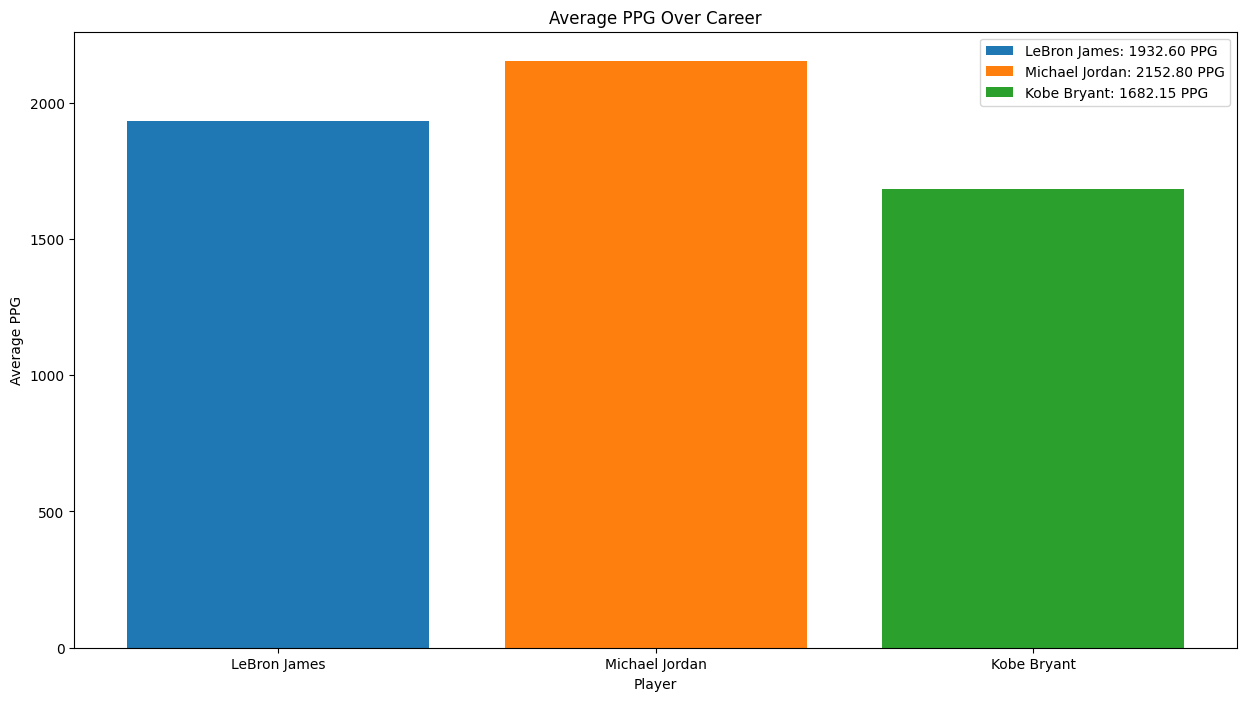

In [43]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

# Function to get player career data
def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()

    # MultiIndex column creation
    header_1 = ['General Info'] * 5
    header_2 = career_dict['resultSets'][0]['headers']

    col = pd.MultiIndex.from_arrays([header_1 + ['Stats'] * (len(header_2) - 5), header_2])
    
    career_data = pd.DataFrame(career_dict['resultSets'][0]['rowSet'], columns=col)
    return career_data

# Players we're interested in
player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]

# Fetch their career data
all_data = {}
for player_name in player_names:
    all_data[player_name] = get_player_career_data(player_name)

# Function to calculate average PPG for each season
def calculate_avg_ppg(player_data):
    return player_data['Stats']['PTS'].mean()

# Calculate average PPG
avg_ppg_data = {}
for player_name, data in all_data.items():
    avg_ppg_data[player_name] = calculate_avg_ppg(data)

# Plotting
plt.figure(figsize=(15, 8))
seasons = range(1, len(player_names) + 1)

for player_name, avg_ppg in avg_ppg_data.items():
    plt.bar(player_name, avg_ppg, label=f"{player_name}: {avg_ppg:.2f} PPG")

plt.title("Average PPG Over Career")
plt.xlabel("Player")
plt.ylabel("Average PPG")
plt.legend()
plt.show()



In [48]:
for name in player_names:
    player_data[name] = get_player_career_data(name)
    print(player_data[name].columns)  # To check the column names


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


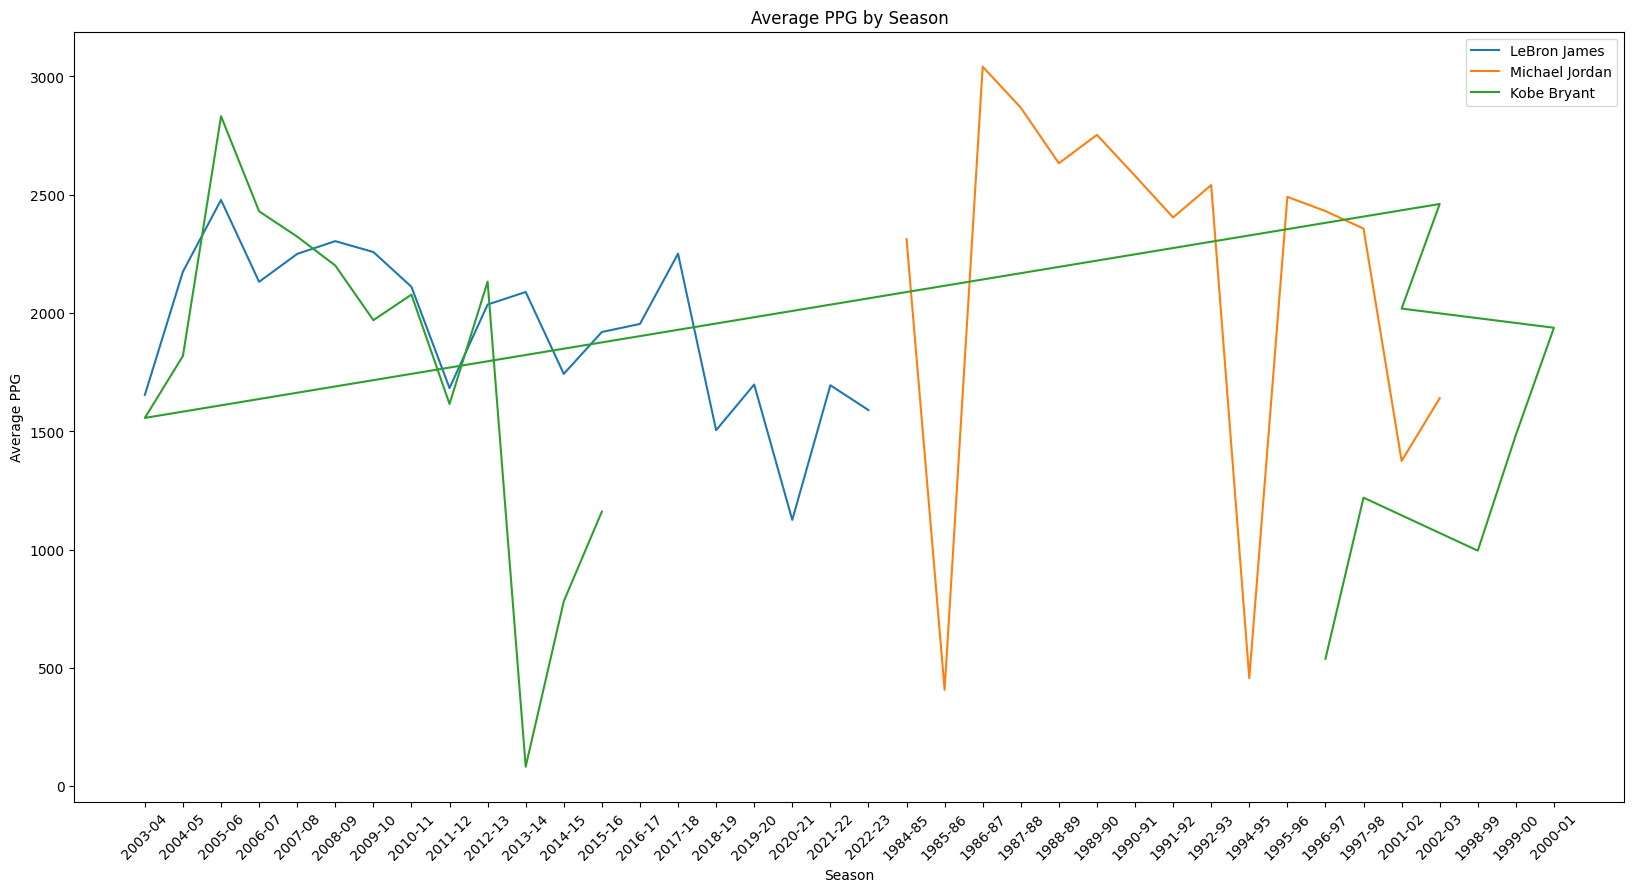

In [50]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()
    headers = career_dict['resultSets'][0]['headers']
    rowSet = career_dict['resultSets'][0]['rowSet']

    df = pd.DataFrame(rowSet, columns=headers)
    return df

player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]  # Add the players you want to compare
player_data = {}

for name in player_names:
    player_data[name] = get_player_career_data(name)

def calculate_seasonal_avg_ppg(df):
    # Group by SEASON_ID and calculate the mean of PTS
    return df.groupby('SEASON_ID')['PTS'].mean()

avg_ppg_by_season = {}
for name, data in player_data.items():
    avg_ppg_by_season[name] = calculate_seasonal_avg_ppg(data)

# plt.figure(figsize=[20,10])
# for name, data in avg_ppg_by_season.items():
#     plt.plot(data.index, data, label=name)

# plt.legend()
# plt.title('Average PPG by Season')
# plt.xlabel('Season')
# plt.ylabel('Average PPG')
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=[20,10])
# for name, data in avg_ppg_by_season.items():
#     sorted_data = data.sort_index()  # Sort the index before plotting
#     plt.plot(sorted_data.index, sorted_data, label=name)

# plt.legend()
# plt.title('Average PPG by Season')
# plt.xlabel('Season')
# plt.ylabel('Average PPG')
# plt.xticks(rotation=45)
# plt.show()


def calculate_seasonal_avg_ppg(df):
    # Group by SEASON_ID and calculate the mean of PTS
    df['SEASON_START'] = df['SEASON_ID'].apply(lambda x: int(x.split('-')[0]))  # Extract the starting year and convert to integer
    return df.groupby('SEASON_START')['PTS'].mean().sort_index()

plt.figure(figsize=[20,10])
for name, data in avg_ppg_by_season.items():
    sorted_data = calculate_seasonal_avg_ppg(data)  # This data should already be sorted by the starting year now.
    plt.plot(sorted_data.index, sorted_data, label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season Start')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()

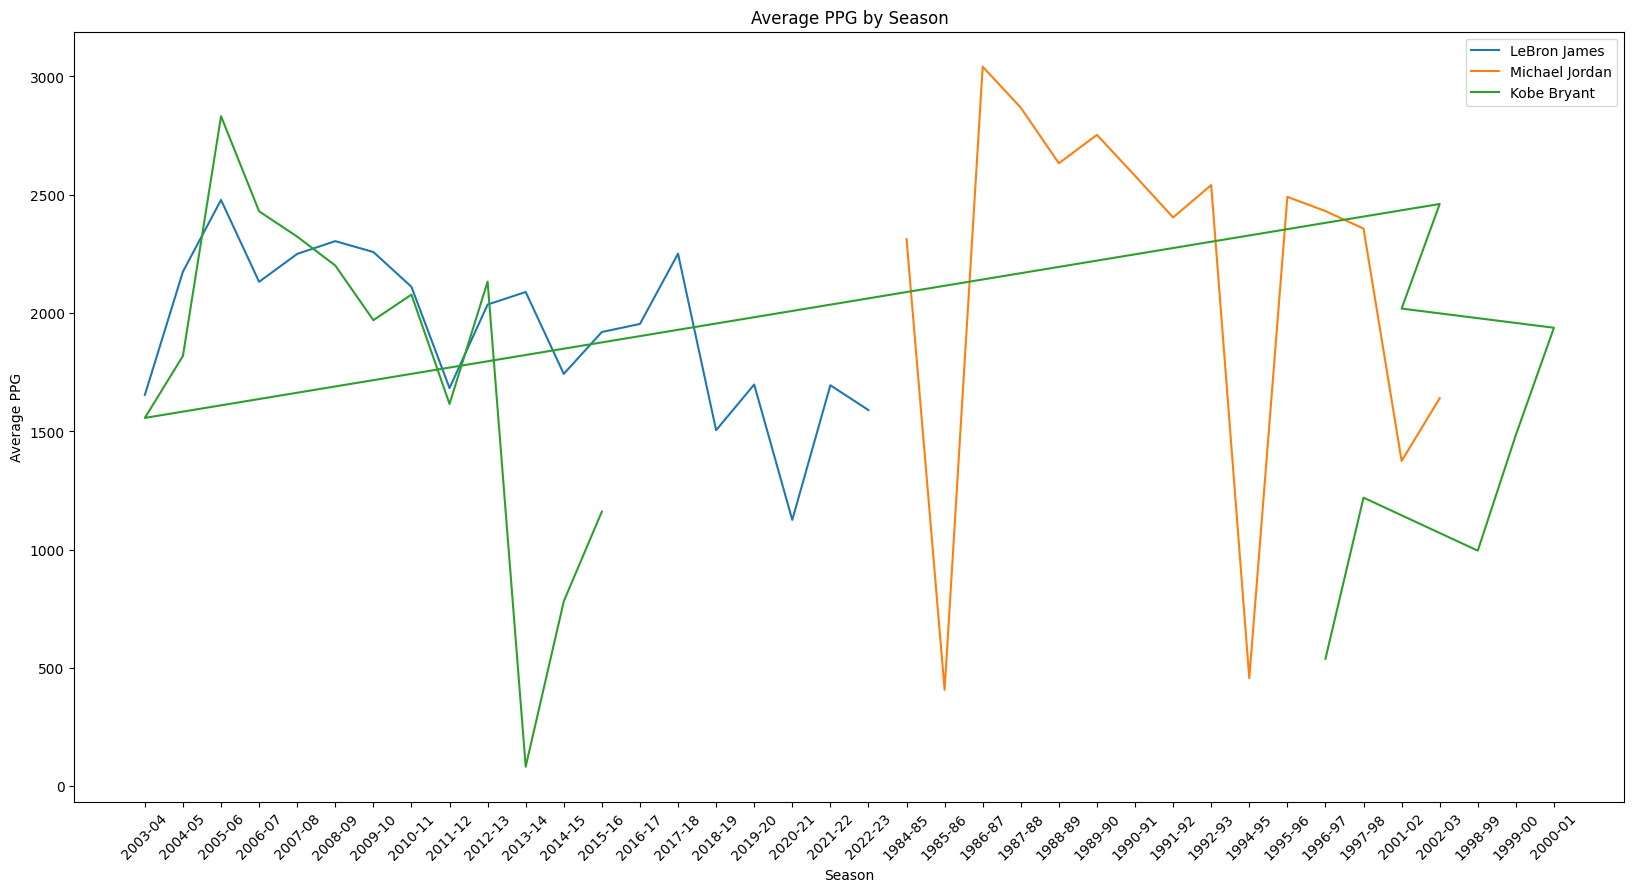

In [51]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()
    headers = career_dict['resultSets'][0]['headers']
    rowSet = career_dict['resultSets'][0]['rowSet']

    df = pd.DataFrame(rowSet, columns=headers)
    df = df.sort_values('SEASON_ID')  # Sorting the DataFrame by SEASON_ID
    return df

player_names = ["LeBron James", "Michael Jordan", "Kobe Bryant"]
player_data = {}

for name in player_names:
    player_data[name] = get_player_career_data(name)

def calculate_seasonal_avg_ppg(df):
    return df.groupby('SEASON_ID')['PTS'].mean().sort_index()

avg_ppg_by_season = {}
for name, data in player_data.items():
    avg_ppg_by_season[name] = calculate_seasonal_avg_ppg(data)

plt.figure(figsize=[20, 10])
for name, data in avg_ppg_by_season.items():
    plt.plot(data.index, data, label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.show()


   SEASON_ID     PLAYER_NAME     PTS
0    1984-85  Michael Jordan  2313.0
1    1985-86  Michael Jordan   408.0
2    1986-87  Michael Jordan  3041.0
3    1987-88  Michael Jordan  2868.0
4    1988-89  Michael Jordan  2633.0
5    1989-90  Michael Jordan  2753.0
6    1990-91  Michael Jordan  2580.0
7    1991-92  Michael Jordan  2404.0
8    1992-93  Michael Jordan  2541.0
9    1994-95  Michael Jordan   457.0
10   1995-96  Michael Jordan  2491.0
12   1996-97  Michael Jordan  2431.0
11   1996-97     Kobe Bryant   539.0
13   1997-98     Kobe Bryant  1220.0
14   1997-98  Michael Jordan  2357.0
15   1998-99     Kobe Bryant   996.0
16   1999-00     Kobe Bryant  1485.0
17   2000-01     Kobe Bryant  1938.0
18   2001-02     Kobe Bryant  2019.0
19   2001-02  Michael Jordan  1375.0
20   2002-03     Kobe Bryant  2461.0
21   2002-03  Michael Jordan  1640.0
22   2003-04     Kobe Bryant  1557.0
23   2003-04    LeBron James  1654.0
24   2004-05     Kobe Bryant  1819.0
25   2004-05    LeBron James  2175.0
2

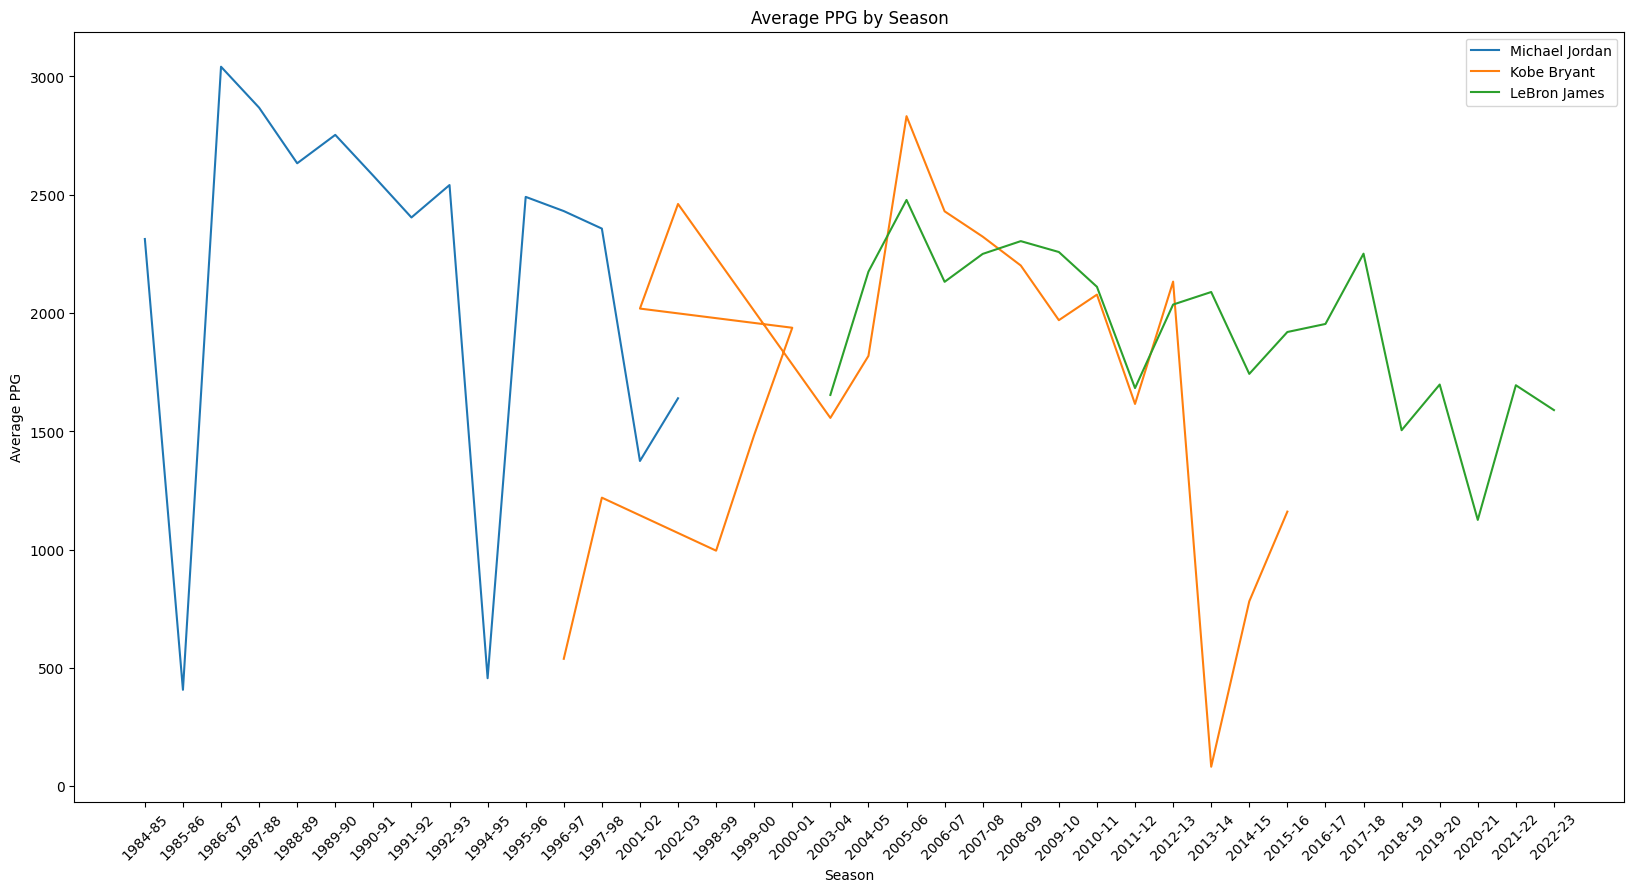

In [62]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
import matplotlib.pyplot as plt

def get_player_career_data(player_name):
    player_dict = players.get_players()
    player = [player for player in player_dict if player['full_name'] == player_name][0]
    player_id = player['id']

    career = PlayerCareerStats(player_id=player_id)
    career_dict = career.get_dict()
    headers = career_dict['resultSets'][0]['headers']
    rowSet = career_dict['resultSets'][0]['rowSet']

    df = pd.DataFrame(rowSet, columns=headers)
    df['PLAYER_NAME'] = player_name  # Adding a column to identify the player
    return df

# player_names = ["Kobe Bryant"]
player_names = ["Michael Jordan", "Kobe Bryant","LeBron James"]
all_player_data = pd.DataFrame()  # Initialize an empty DataFrame to collect all player data

# Retrieve data for each player and append to the all_player_data DataFrame
for name in player_names:
    player_df = get_player_career_data(name)
    all_player_data = pd.concat([all_player_data, player_df], ignore_index=True)

# # Group by both SEASON_ID and PLAYER_NAME and calculate the mean of PTS
# avg_ppg_by_season = all_player_data.groupby(['SEASON_ID', 'PLAYER_NAME'])['PTS'].mean().reset_index()

# # Sort by SEASON_ID for good measure, although it should already be sorted
# avg_ppg_by_season = avg_ppg_by_season.sort_values('SEASON_ID')

# # Plotting
# plt.figure(figsize=[20, 10])

# for name in player_names:
#     player_data = avg_ppg_by_season[avg_ppg_by_season['PLAYER_NAME'] == name]
#     plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

# plt.legend()
# plt.title('Average PPG by Season')
# plt.xlabel('Season')
# plt.ylabel('Average PPG')
# plt.xticks(rotation=45)
# plt.show()


# ... Your previous code for gathering data remains the same

# Group by both SEASON_ID and PLAYER_NAME and calculate the mean of PTS
avg_ppg_by_season = all_player_data.groupby(['SEASON_ID', 'PLAYER_NAME'])['PTS'].mean().reset_index()

# Explicitly sort by SEASON_ID to ensure they are in the correct order
avg_ppg_by_season = avg_ppg_by_season.sort_values('SEASON_ID')

# Print to check the sorting
print(avg_ppg_by_season)

# Get unique, sorted season IDs for x-ticks
unique_season_ids = sorted(avg_ppg_by_season['SEASON_ID'].unique())

# Plotting
plt.figure(figsize=[20, 10])

for name in player_names:
    player_data = avg_ppg_by_season[avg_ppg_by_season['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

plt.xticks(unique_season_ids, rotation=45)  # Set x-ticks using unique_season_ids
plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')
plt.show()


   SEASON_ID     PLAYER_NAME     PTS
11   1996-97     Kobe Bryant   539.0
13   1997-98     Kobe Bryant  1220.0
15   1998-99     Kobe Bryant   996.0
16   1999-00     Kobe Bryant  1485.0
17   2000-01     Kobe Bryant  1938.0
18   2001-02     Kobe Bryant  2019.0
20   2002-03     Kobe Bryant  2461.0
22   2003-04     Kobe Bryant  1557.0
24   2004-05     Kobe Bryant  1819.0
26   2005-06     Kobe Bryant  2832.0
28   2006-07     Kobe Bryant  2430.0
30   2007-08     Kobe Bryant  2323.0
32   2008-09     Kobe Bryant  2201.0
34   2009-10     Kobe Bryant  1970.0
36   2010-11     Kobe Bryant  2078.0
38   2011-12     Kobe Bryant  1616.0
40   2012-13     Kobe Bryant  2133.0
42   2013-14     Kobe Bryant    83.0
44   2014-15     Kobe Bryant   782.0
46   2015-16     Kobe Bryant  1161.0
23   2003-04    LeBron James  1654.0
25   2004-05    LeBron James  2175.0
27   2005-06    LeBron James  2478.0
29   2006-07    LeBron James  2132.0
31   2007-08    LeBron James  2250.0
33   2008-09    LeBron James  2304.0
3

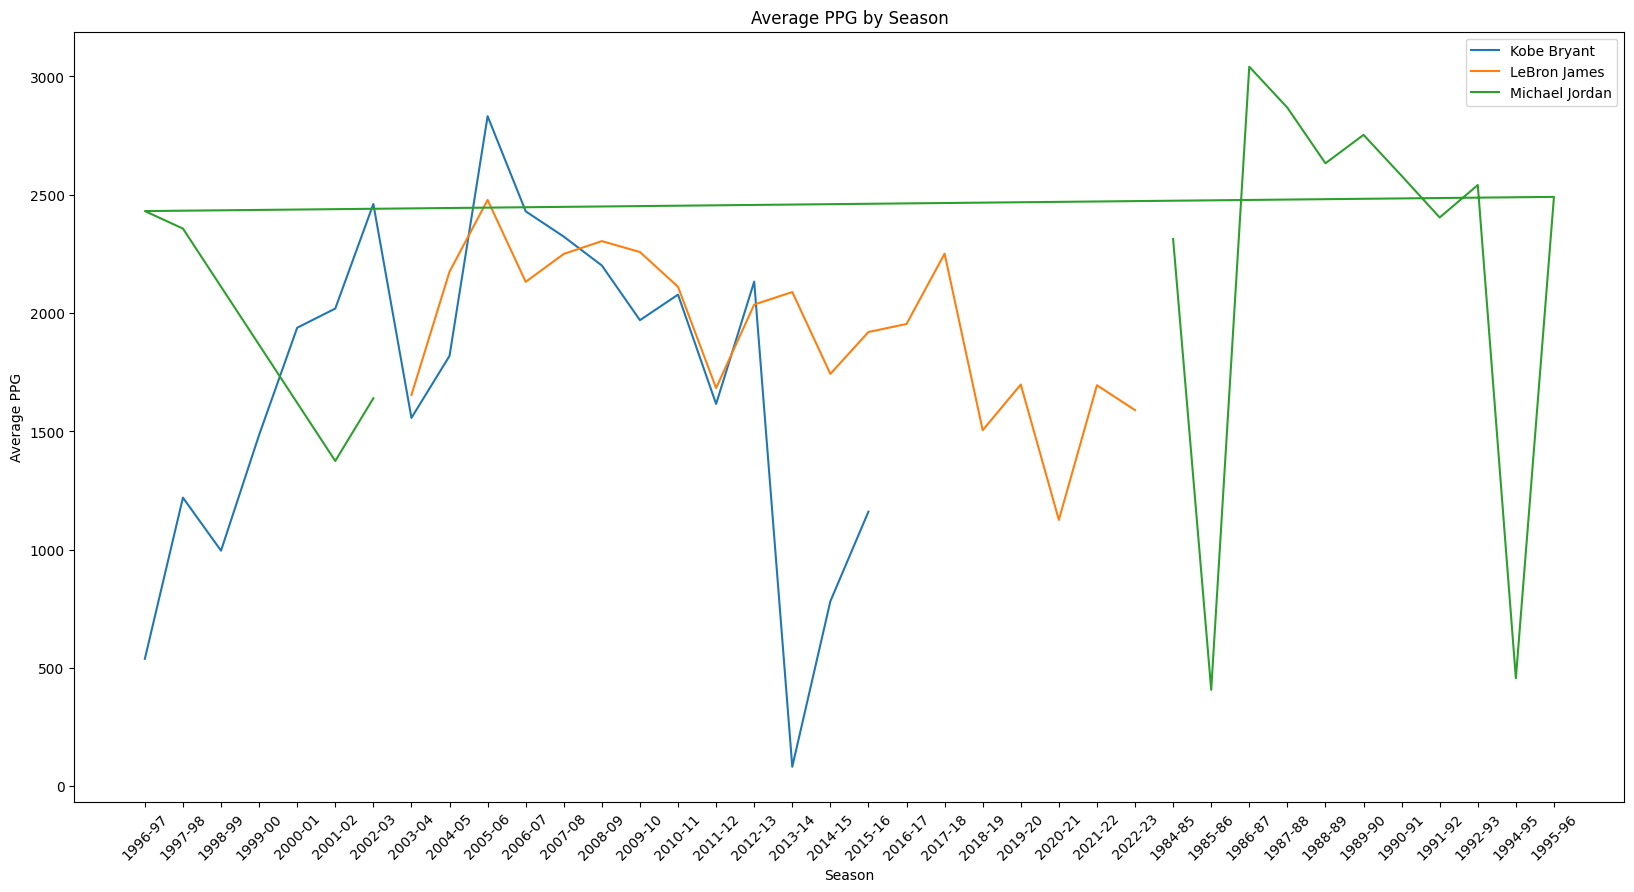

In [63]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Print to check the sorting
print(avg_ppg_by_season)

# Get unique player names for plotting
player_names = avg_ppg_by_season['PLAYER_NAME'].unique()

# Plotting
plt.figure(figsize=[20, 10])

for name in player_names:
    player_data = avg_ppg_by_season[avg_ppg_by_season['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


   SEASON_ID     PLAYER_NAME     PTS
11   1996-97     Kobe Bryant   539.0
13   1997-98     Kobe Bryant  1220.0
15   1998-99     Kobe Bryant   996.0
16   1999-00     Kobe Bryant  1485.0
17   2000-01     Kobe Bryant  1938.0
18   2001-02     Kobe Bryant  2019.0
20   2002-03     Kobe Bryant  2461.0
22   2003-04     Kobe Bryant  1557.0
24   2004-05     Kobe Bryant  1819.0
26   2005-06     Kobe Bryant  2832.0
28   2006-07     Kobe Bryant  2430.0
30   2007-08     Kobe Bryant  2323.0
32   2008-09     Kobe Bryant  2201.0
34   2009-10     Kobe Bryant  1970.0
36   2010-11     Kobe Bryant  2078.0
38   2011-12     Kobe Bryant  1616.0
40   2012-13     Kobe Bryant  2133.0
42   2013-14     Kobe Bryant    83.0
44   2014-15     Kobe Bryant   782.0
46   2015-16     Kobe Bryant  1161.0
23   2003-04    LeBron James  1654.0
25   2004-05    LeBron James  2175.0
27   2005-06    LeBron James  2478.0
29   2006-07    LeBron James  2132.0
31   2007-08    LeBron James  2250.0
33   2008-09    LeBron James  2304.0
3

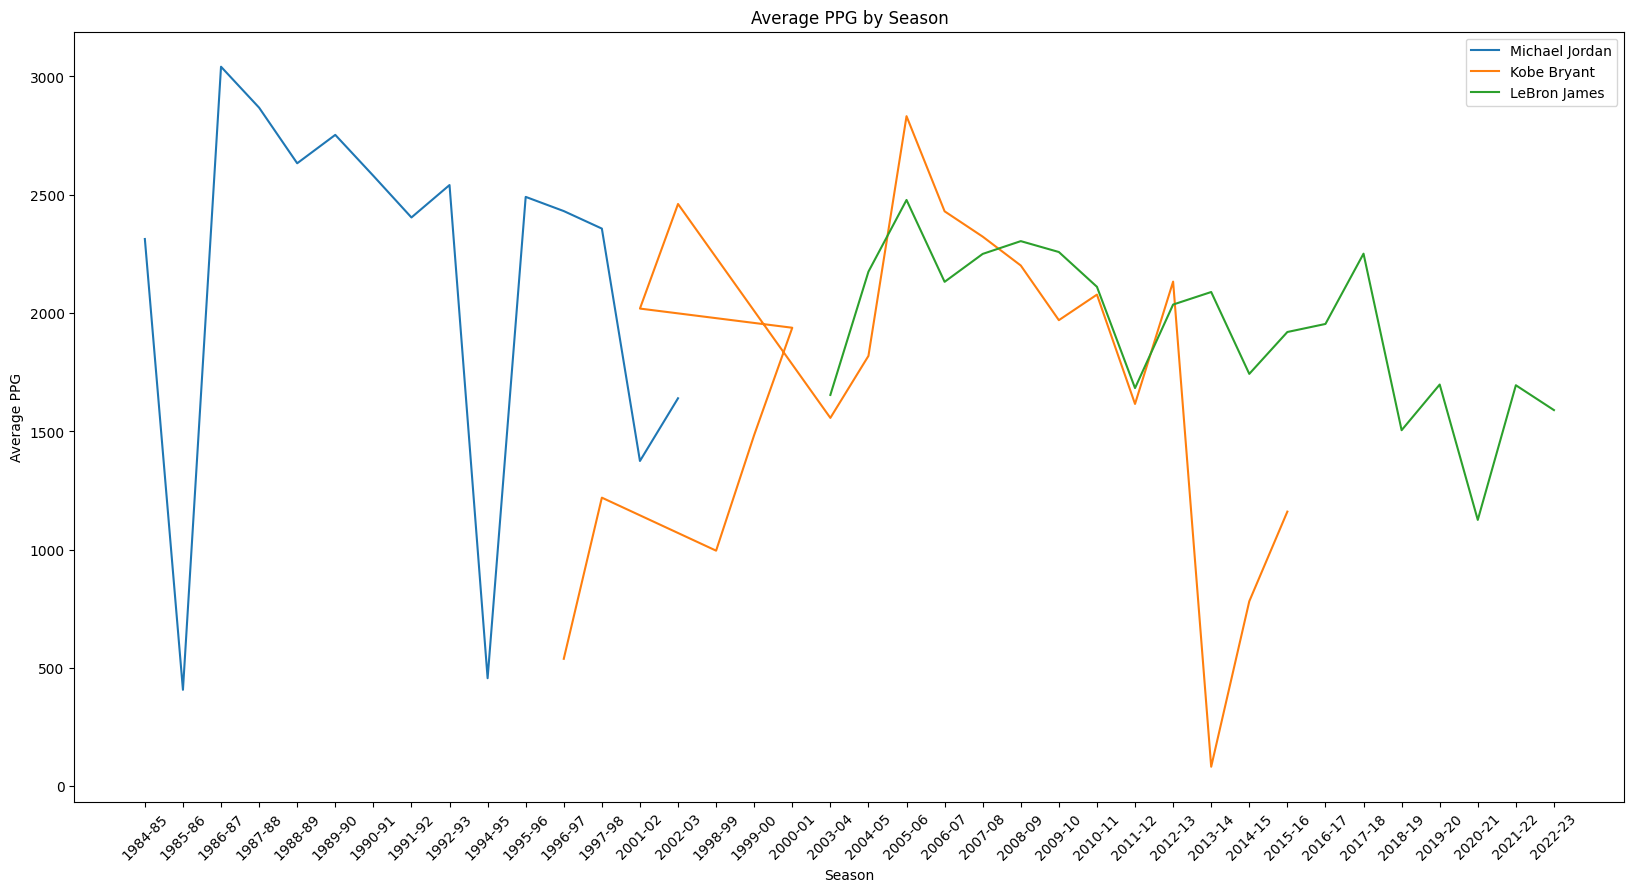

In [64]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Print to check the sorting
print(avg_ppg_by_season)

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = avg_ppg_by_season[avg_ppg_by_season['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


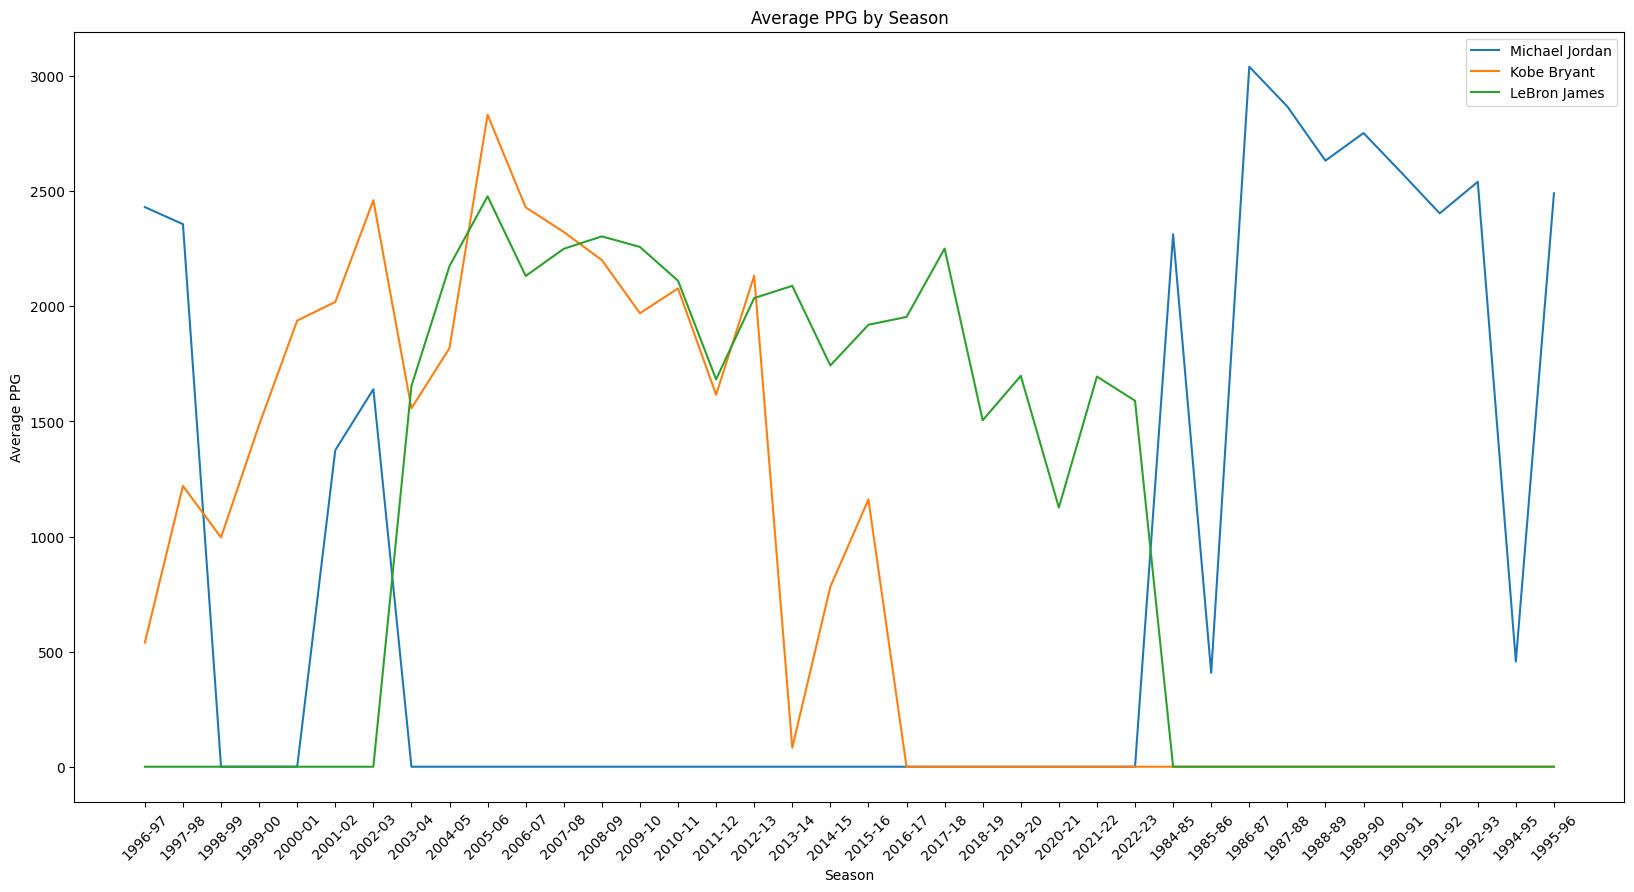

In [65]:
# this is the one you want. It finally fixes the issues where the plots were connecting weirdly (because years were being skipped)
# the issue (with the other previous graphs) was that for players who took a break, it didnt plot the break years which led to some
# issues with 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame: Replace this with your actual DataFrame
# avg_ppg_by_season = pd.DataFrame(your_data_here)

# Sort by PLAYER_NAME and then by SEASON_ID
avg_ppg_by_season = avg_ppg_by_season.sort_values(['PLAYER_NAME', 'SEASON_ID'])

# Find the unique seasons and players
unique_seasons = avg_ppg_by_season['SEASON_ID'].unique()
unique_players = avg_ppg_by_season['PLAYER_NAME'].unique()

# Create a DataFrame with all combinations of players and seasons
all_combinations = pd.DataFrame([(player, season) for player in unique_players for season in unique_seasons], columns=['PLAYER_NAME', 'SEASON_ID'])

# Merge it with the original DataFrame
merged_df = pd.merge(all_combinations, avg_ppg_by_season, how='left', on=['PLAYER_NAME', 'SEASON_ID'])

# Fill missing points with 0
merged_df['PTS'].fillna(0, inplace=True)

# Find the earliest season for each player
earliest_season = avg_ppg_by_season.groupby('PLAYER_NAME')['SEASON_ID'].min().reset_index()

# Sort player names based on their earliest season
sorted_players = earliest_season.sort_values('SEASON_ID')['PLAYER_NAME']

# Plotting
plt.figure(figsize=[20, 10])

for name in sorted_players:
    player_data = merged_df[merged_df['PLAYER_NAME'] == name]
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=name)

plt.legend()
plt.title('Average PPG by Season')
plt.xlabel('Season')
plt.ylabel('Average PPG')

# Optionally rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


In [61]:
print(avg_ppg_by_season)


   SEASON_ID     PLAYER_NAME     PTS
0    1984-85  Michael Jordan  2313.0
1    1985-86  Michael Jordan   408.0
2    1986-87  Michael Jordan  3041.0
3    1987-88  Michael Jordan  2868.0
4    1988-89  Michael Jordan  2633.0
5    1989-90  Michael Jordan  2753.0
6    1990-91  Michael Jordan  2580.0
7    1991-92  Michael Jordan  2404.0
8    1992-93  Michael Jordan  2541.0
9    1994-95  Michael Jordan   457.0
10   1995-96  Michael Jordan  2491.0
12   1996-97  Michael Jordan  2431.0
11   1996-97     Kobe Bryant   539.0
13   1997-98     Kobe Bryant  1220.0
14   1997-98  Michael Jordan  2357.0
15   1998-99     Kobe Bryant   996.0
16   1999-00     Kobe Bryant  1485.0
17   2000-01     Kobe Bryant  1938.0
18   2001-02     Kobe Bryant  2019.0
19   2001-02  Michael Jordan  1375.0
20   2002-03     Kobe Bryant  2461.0
21   2002-03  Michael Jordan  1640.0
22   2003-04     Kobe Bryant  1557.0
23   2003-04    LeBron James  1654.0
24   2004-05     Kobe Bryant  1819.0
25   2004-05    LeBron James  2175.0
2

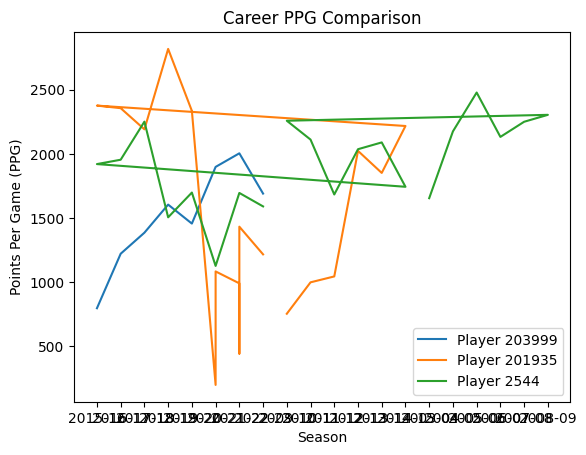

In [28]:
import matplotlib.pyplot as plt

# List of player IDs to compare
player_ids = [203999, 201935, 2544]  # Example player IDs

# Create a DataFrame for each player's career data (similar to what you've done)
player_career_data_list = []

for player_id in player_ids:
    career = PlayerCareerStats(player_id=str(player_id))
    career_dict = career.get_dict()
    data = career_dict['resultSets'][0]['rowSet']
    headers = career_dict['resultSets'][0]['headers']
    player_career_data = pd.DataFrame(data, columns=headers)
    player_career_data_list.append(player_career_data)

# Plot career PPG for selected players
for i, player_id in enumerate(player_ids):
    player_data = player_career_data_list[i]
    plt.plot(player_data['SEASON_ID'], player_data['PTS'], label=f'Player {player_id}')

plt.xlabel('Season')
plt.ylabel('Points Per Game (PPG)')
plt.title('Career PPG Comparison')
plt.legend()
plt.show()

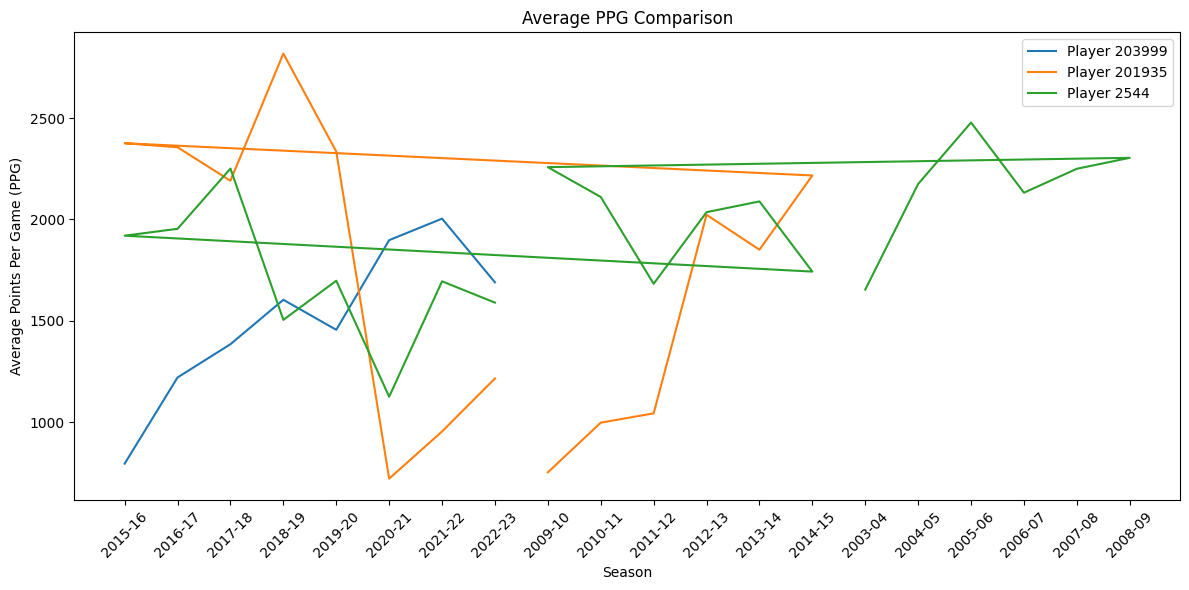

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# List of player IDs to compare
player_ids = [203999, 201935, 2544]  # Example player IDs

# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjust the figsize as needed

# Plot average PPG per season for selected players
for player_id in player_ids:
    career = PlayerCareerStats(player_id=str(player_id))
    # Extract the data and headers from the response dictionary for each player
    career_dict = career.get_dict()
    data = career_dict['resultSets'][0]['rowSet']
    headers = career_dict['resultSets'][0]['headers']

    # Create a DataFrame using the data and headers
    career_data = pd.DataFrame(data, columns=headers)

    # Calculate average PPG per season for the player
    avg_ppg = career_data.groupby('SEASON_ID')['PTS'].mean().reset_index()
    plt.plot(avg_ppg['SEASON_ID'], avg_ppg['PTS'], label=f'Player {player_id}')

plt.xlabel('Season')
plt.ylabel('Average Points Per Game (PPG)')
plt.title('Average PPG Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.tight_layout()  # Ensures all elements fit within the plot area
plt.show()




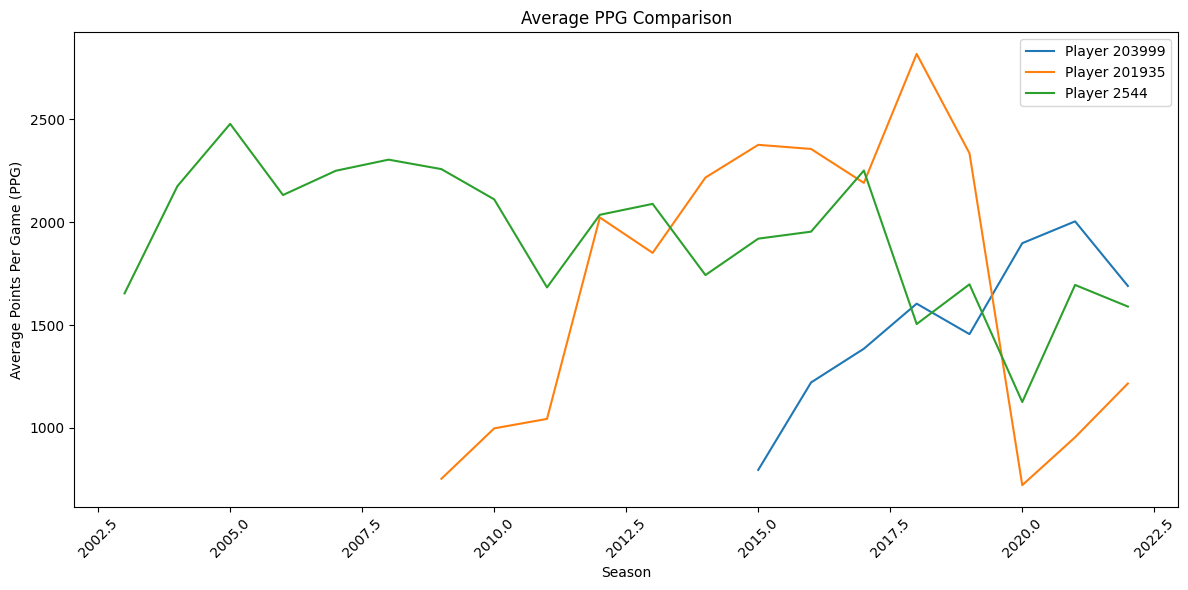

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# List of player IDs to compare
player_ids = [203999, 201935, 2544]  # Example player IDs

# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjust the figsize as needed

# Plot average PPG per season for selected players
for player_id in player_ids:
    career = PlayerCareerStats(player_id=str(player_id))
    # Extract the data and headers from the response dictionary for each player
    career_dict = career.get_dict()
    data = career_dict['resultSets'][0]['rowSet']
    headers = career_dict['resultSets'][0]['headers']

    # Create a DataFrame using the data and headers
    career_data = pd.DataFrame(data, columns=headers)

    # Convert 'SEASON_ID' to numerical format for correct sorting
    career_data['SEASON_ID'] = career_data['SEASON_ID'].str.extract('(\d+)').astype(int)

    # Sort the data by 'SEASON_ID'
    career_data = career_data.sort_values(by='SEASON_ID')

    # Calculate average PPG per season for the player
    avg_ppg = career_data.groupby('SEASON_ID')['PTS'].mean().reset_index()

    # Plot the data
    plt.plot(avg_ppg['SEASON_ID'], avg_ppg['PTS'], label=f'Player {player_id}')

plt.xlabel('Season')
plt.ylabel('Average Points Per Game (PPG)')
plt.title('Average PPG Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.tight_layout()  # Ensures all elements fit within the plot area
plt.show()


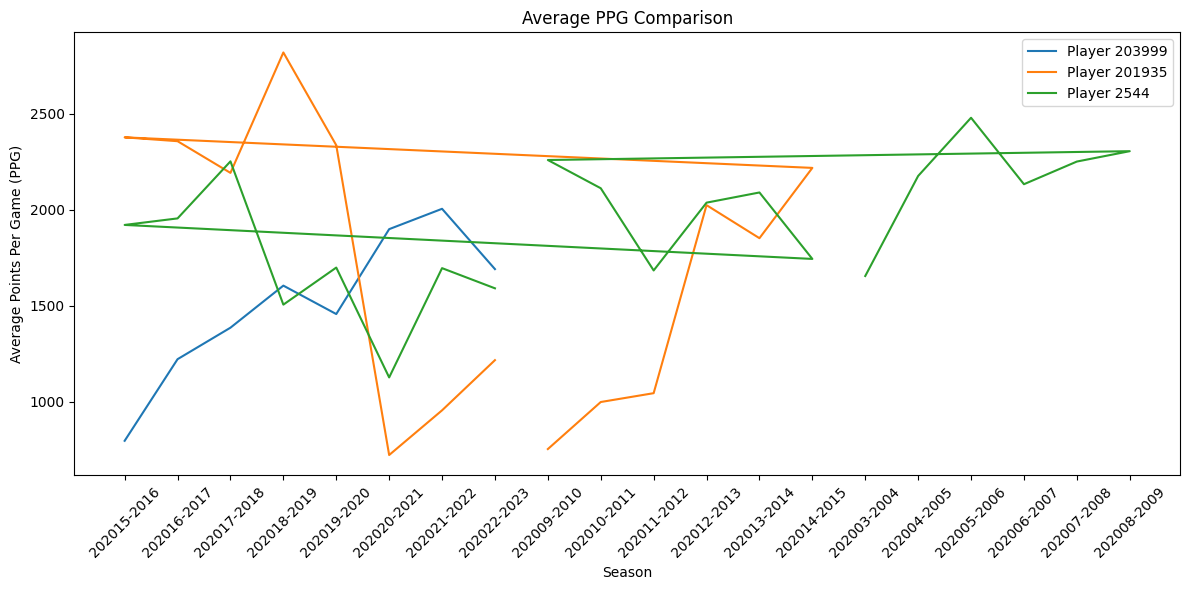

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.endpoints import PlayerCareerStats

# List of player IDs to compare
player_ids = [203999, 201935, 2544]  # Example player IDs

# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjust the figsize as needed

# Plot average PPG per season for selected players
for player_id in player_ids:
    career = PlayerCareerStats(player_id=str(player_id))
    # Extract the data and headers from the response dictionary for each player
    career_dict = career.get_dict()
    data = career_dict['resultSets'][0]['rowSet']
    headers = career_dict['resultSets'][0]['headers']

    # Create a DataFrame using the data and headers
    career_data = pd.DataFrame(data, columns=headers)

    # Convert 'SEASON_ID' to numerical format for correct sorting
    career_data['SEASON_ID'] = career_data['SEASON_ID'].str.extract('(\d+)').astype(int)

    # Sort the data by 'SEASON_ID'
    career_data = career_data.sort_values(by='SEASON_ID')

    # Calculate average PPG per season for the player
    avg_ppg = career_data.groupby('SEASON_ID')['PTS'].mean().reset_index()

    # Map SEASON_ID to actual years for x-axis labels
    avg_ppg['SEASON_ID'] = avg_ppg['SEASON_ID'].apply(lambda x: f"20{x:02d}-{x+1:02d}")

    # Plot the data
    plt.plot(avg_ppg['SEASON_ID'], avg_ppg['PTS'], label=f'Player {player_id}')

plt.xlabel('Season')
plt.ylabel('Average Points Per Game (PPG)')
plt.title('Average PPG Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.tight_layout()  # Ensures all elements fit within the plot area
plt.show()

